In [262]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
path=r'D:\DataSets\Corona\World\reference_hospitalization_all_locs.csv'
path=path.replace('\\','/')
df=pd.read_csv(path,low_memory=False)


In [264]:
df=df.loc[df['location_name']=='Germany']
df=df[df['confirmed_infections_data_type']=='observed']
df_infec=df[['date','confirmed_infections','confirmed_infections_data_type']]

In [265]:
df_infec.set_index('date',inplace=True)


In [266]:
df_infec.index=pd.to_datetime(df_infec.index)

In [267]:
#Don´t forget to assign it, because it doesn´t have a inplace parameter
df_freq=df_infec.asfreq('D')

In [268]:
df_freq.index

DatetimeIndex(['2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13',
               ...
               '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
               '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06',
               '2021-03-07', '2021-03-08'],
              dtype='datetime64[ns]', name='date', length=399, freq='D')

In [270]:
df_freq

,confirmed_infections,confirmed_infections_data_type
date,,
2020-02-04,0.0,observed
2020-02-05,0.0,observed
2020-02-06,1.0,observed
2020-02-07,1.0,observed
2020-02-08,0.0,observed
...,...,...
2021-03-04,11912.0,observed
2021-03-05,10580.0,observed
2021-03-06,9557.0,observed


In [307]:
df_weekly=df_freq.resample('W').mean().round()
df_monthly=df_freq.resample('M').mean().round()
df_diff=df_freq['confirmed_infections'].diff()

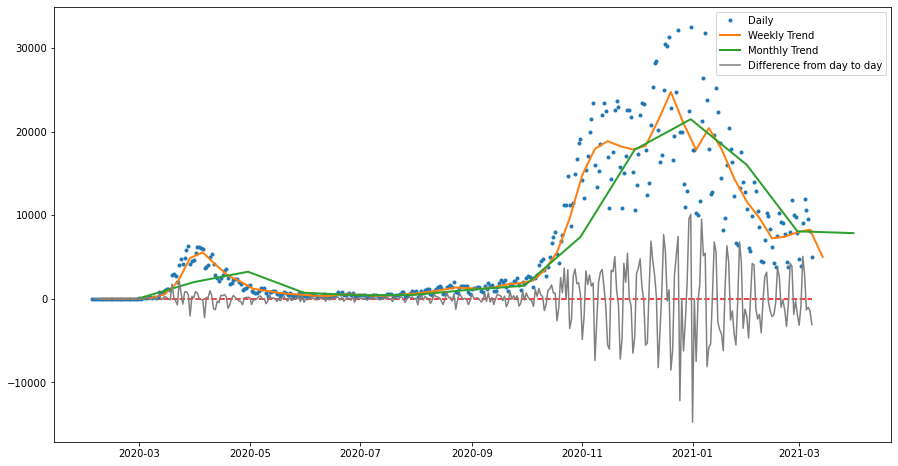

In [317]:
#Create the plot
fig,ax=plt.subplots(figsize=(15,8))

#Plot the total Data
ax.plot(df_freq['confirmed_infections'],
       marker='.',
       linestyle='None',
       markersize=6,
       label='Daily')

#adding the weekly
ax.plot(df_weekly['confirmed_infections'],
       linewidth=2,
       label='Weekly Trend')

#adding monthly treng
ax.plot(df_monthly['confirmed_infections'],
       linewidth=2,
       label='Monthly Trend')

ax.plot(df_diff,
       color='grey',
       label='Difference from day to day')

plt.hlines(y=0,
           xmin=df_freq.index.min(),
           xmax=df_freq.index.max(),
          linestyle='--',
          color='red'
          )

ax.legend()

In [314]:
df_freq.index.max()

Timestamp('2021-03-08 00:00:00', freq='D')

<AxesSubplot:xlabel='date'>

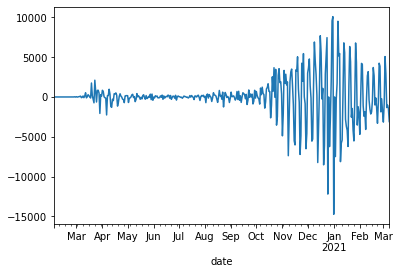